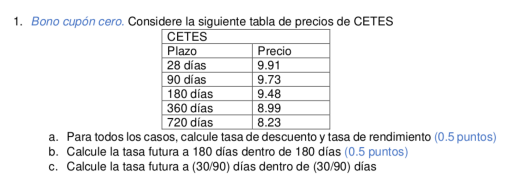

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer la imagen desde el archivo
imagen = Image.open('1.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Omitir los ejes para una mejor visualización
plt.show()

## Cálculo de Tasas para CETES

Los **CETES** son instrumentos de deuda del gobierno conocidos como bonos cupón cero. Esto significa que no generan pagos de intereses periódicos. En lugar de ello, se adquieren a un precio inferior al valor nominal y al vencimiento, el gobierno paga el valor nominal completo.

### Tasa de Descuento

La **tasa de descuento** se refiere al interés implícito que se gana al comprar el bono a un precio menor que su valor nominal. Se calcula utilizando la diferencia entre el valor nominal y el precio de compra, ajustado al plazo del bono:

$ T_d = \left( \frac{Valor\ Nominal - Precio}{Valor\ Nominal} \right) \times \left( \frac{360}{Días} \right) $

Donde:
- $ T_d $ es la tasa de descuento.
- "Valor Nominal" es el valor que el bono tendrá al finalizar su plazo, comúnmente $10.00 MXN para los CETES.
- "Precio" es el costo de adquisición del CETE.
- "Días" es el plazo hasta el vencimiento del CETE.

### Tasa de Rendimiento

La **tasa de rendimiento**, también conocida como la tasa de interés efectiva, se calcula utilizando la relación entre el precio actual y el valor nominal, teniendo en cuenta el tiempo hasta el vencimiento. La fórmula es:

$ T_y = \left( \frac{Valor\ Nominal}{Precio} \right)^{\frac{360}{Días}} - 1 $

Donde:
- $ T_y $ es la tasa de rendimiento.
- "Valor Nominal" y "Precio" se definen igual que en la tasa de descuento.
- "Días" representa el número de días hasta el vencimiento del CETE.

Estas tasas nos permiten entender la rentabilidad esperada de invertir en CETES para diferentes períodos, considerando el precio actual y el valor nominal al vencimiento.


In [2]:
# Datos de los CETES
cetes = [
    {'dias': 28, 'precio': 9.91},
    {'dias': 90, 'precio': 9.73},
    {'dias': 180, 'precio': 9.48},
    {'dias': 360, 'precio': 8.99},
    {'dias': 720, 'precio': 8.23}
]

# Valor nominal de los CETES
valor_nominal = 10

# Calculamos la tasa de descuento y la tasa de rendimiento para cada plazo
resultados = []
for cete in cetes:
    tasa_descuento = ((valor_nominal - cete['precio']) / valor_nominal) * (360 / cete['dias'])
    tasa_rendimiento = ((valor_nominal / cete['precio']) ** (360 / cete['dias'])) - 1
    resultados.append({
        'dias': cete['dias'],
        'tasa_descuento': tasa_descuento,
        'tasa_rendimiento': tasa_rendimiento
    })

resultados


[{'dias': 28,
  'tasa_descuento': 0.11571428571428553,
  'tasa_rendimiento': 0.12326334042467524},
 {'dias': 90,
  'tasa_descuento': 0.10799999999999983,
  'tasa_rendimiento': 0.11570309782069499},
 {'dias': 180,
  'tasa_descuento': 0.10399999999999991,
  'tasa_rendimiento': 0.11271341843365557},
 {'dias': 360,
  'tasa_descuento': 0.10099999999999998,
  'tasa_rendimiento': 0.11234705228031139},
 {'dias': 720,
  'tasa_descuento': 0.08849999999999998,
  'tasa_rendimiento': 0.10230069793844221}]

### Tasa Forward

Las tasas forward (o tasas de interés a futuro) son tasas de interés aplicables a un préstamo o inversión que comenzará en el futuro. Una tasa forward se calcula a partir de las tasas spot (tasas de interés actuales para períodos inmediatos) para diferentes plazos, y proporciona una manera de "asegurar" una tasa de interés para un préstamo o inversión que comenzará en algún momento futuro.

#### Fórmula General de la Tasa Forward

La fórmula para calcular una tasa forward entre dos tiempos, `T_1` y `T_2`, utilizando las tasas spot $r_{T_1}$ y $r_{T_2}$ es:



$1 + r_{futura}(T_2 - T_1) = \frac{(1 + r_{T_2})^{T_2}}{(1 + r_{T_1})^{T_1}}$


donde:
- $r_{futura}$ es la tasa forward que queremos encontrar.
- $T_1$ y $T_2$ son los tiempos al inicio y al final del período de la tasa forward, respectivamente, expresados en la misma unidad de tiempo (usualmente días o años).
- $r_{T_1}$ y $r_{T_2}$ son las tasas de interés spot para los tiempos $T_1$ y $T_2$, respectivamente.

#### Significado de los Componentes

- **Tasa Spot ($r_{T_1}$, $r_{T_2}$)**: Son las tasas de interés actuales disponibles para diferentes períodos. Por ejemplo, una tasa spot para 180 días representa el rendimiento que uno esperaría al invertir en un instrumento financiero (como un CETE) hoy y mantenerlo durante 180 días.

- **Tasa Forward ($r_{futura}$)**: Es una tasa de interés que se aplica a una inversión o préstamo que comenzará en el futuro y terminará aún más adelante. Esta tasa es particularmente útil para cobertura y planificación financiera, ya que permite a los inversores y prestatarios "bloquear" tasas de interés futuras hoy, evitando la incertidumbre.

#### Despeje de la Fórmula para Encontrar $r_{futura}$

Partiendo de la fórmula general, queremos despejar $r_{futura}$ para entender cuánto será la tasa de interés entre $T_1$ y $T_2$:



In [7]:
# Definiendo los valores
r_180 = resultados[2]['tasa_rendimiento']  # Tasa de rendimiento anualizada para CETES de 180 días
r_360 = resultados[3]['tasa_rendimiento']  # Tasa de rendimiento anualizada para CETES de 360 días
T_1 = 180
T_2 = 360

# Calculando la tasa forward de 180 días dentro de 180 días (anualizada)
# Primero, calculamos el lado derecho de la fórmula
derecho = ((1 + r_360)**(T_2/360)) / ((1 + r_180)**(T_1/360))

# Ahora, despejamos para encontrar la tasa forward anualizada (considerando el número de días)
r_futura = (derecho - 1) / ((T_2 - T_1) / 360)  # Despejamos la tasa futura

r_futura


0.1090100111234702

### Tasa Forward para un período futuro

La tasa forward entre dos períodos, $T_1$ y $T_2$, se calcula utilizando las tasas de interés spot para esos períodos. La fórmula general para la tasa forward es:

$1 + r_{futura}(T_2 - T_1) = \frac{(1 + r_{T_2})^{T_2/360}}{(1 + r_{T_1})^{T_1/360}}$

donde:
- $r_{futura}$ es la tasa forward que queremos encontrar.
- $T_1$ y $T_2$ son los tiempos al inicio y al final del período de la tasa forward, respectivamente, expresados en días.
- $r_{T_1}$ y $r_{T_2}$ son las tasas de interés spot (actuales) anualizadas para los períodos $T_1$ y $T_2$, respectivamente.

#### Cálculo Paso a Paso para la Tasa Forward de 30 días dentro de 90 días

Siguiendo el caso específico donde queremos calcular la tasa forward para un préstamo o inversión que comienza en 90 días y termina en 120 días, los pasos serían los siguientes:

1. Identificar las tasas de interés spot correspondientes a los períodos $T_1 = 90$ días y $T_2 = 120$ días. En este caso, si no tenemos una tasa específica para $T_2$, podemos usar la tasa de 90 días para ambos, $r_{T_1} = r_{T_2} = r_{90}$, donde $r_{90}$ es la tasa de rendimiento anualizada para CETES de 90 días.

2. Sustituir los valores conocidos en la fórmula de la tasa forward:

   $1 + r_{futura}(30) = \frac{(1 + r_{90})^{120/360}}{(1 + r_{90})^{90/360}}$

3. Despejar $r_{futura}$ de la ecuación:

   $r_{futura} = \left( \frac{(1 + r_{90})^{1/3}}{(1 + r_{90})^{1/4}} - 1 \right) \times 12$

   Aquí, multiplicamos por 12 para anualizar la tasa, considerando que $r_{futura}$ se calcula para un período de 30 días.

4. Resolver la ecuación para obtener la tasa forward $r_{futura}$, la cual nos dará la tasa de interés para el período de 30 días que inicia en 90 días desde ahora.

Este cálculo te proporcionará la tasa forward anualizada para el período especificado.


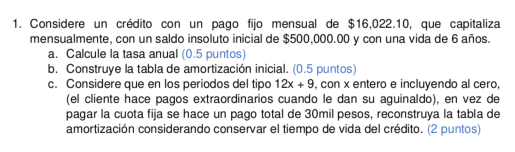

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer la imagen desde el archivo
imagen = Image.open('2.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Omitir los ejes para una mejor visualización
plt.show()

In [ ]:
#saldo adeudado del préstamo (o saldo insoluto)
#Capitaliza mensualmente: Esto significa que los intereses se calculan y se 
#agregan al saldo insoluto cada mes.
#"capitalizar" se refiere a la adición de intereses al monto principal del préstamo

In [4]:
import numpy_financial as npf

# Datos del problema
P = 16022.10  # Pago mensual
PV = 500000   # Saldo insoluto inicial
n = 72        # Duración del préstamo en meses

# Usando la función financiera de numpy para calcular la tasa de interés mensual
r_mensual = npf.rate(n, -P, PV, 0)

# Convertir la tasa mensual a anual
r_anual = (1 + r_mensual)**12 - 1

r_mensual, r_anual

(0.027499996978009703, 0.384783726598825)

In [7]:
# Importar la librería para trabajar con DataFrames
import pandas as pd

# Definir las variables iniciales
saldo = PV  # Saldo inicial, que es el monto del préstamo
tasa = r_mensual  # Tasa de interés mensual calculada anteriormente
num_pagos = n  # Número total de pagos
pago_mensual = P  # Pago mensual

# Crear un DataFrame vacío para la tabla de amortización
tabla_amortizacion = pd.DataFrame(columns=['Pago', 'Interés', 'Principal', 'Saldo Final'])

# Rellenar la tabla de amortización
for i in range(1, num_pagos + 1):
    interes = saldo * tasa
    principal = pago_mensual - interes
    saldo_final = saldo - principal
    fila = pd.DataFrame({'Pago': [i], 'Interés': [interes], 'Principal': [principal], 'Saldo Final': [saldo_final]})
    tabla_amortizacion = pd.concat([tabla_amortizacion, fila], ignore_index=True)
    saldo = saldo_final  # Actualizar el saldo para el próximo ciclo

# Mostrar la tabla de amortización
print(tabla_amortizacion)


   Pago       Interés     Principal   Saldo Final
0     1  13749.998489   2272.101511  4.977279e+05
1     2  13687.515704   2334.584296  4.953933e+05
2     3  13623.314643   2398.785357  4.929945e+05
3     4  13557.348053   2464.751947  4.905298e+05
4     5  13489.567382   2532.532618  4.879972e+05
..  ...           ...           ...           ...
67   68   2032.339111  13989.760889  5.991349e+04
68   69   1647.620729  14374.479271  4.553901e+04
69   70   1252.322592  14769.777408  3.076923e+04
70   71    846.153758  15175.946242  1.559328e+04
71   72    428.815283  15593.284717  6.999544e-07

[72 rows x 4 columns]


/tmp/ipykernel_11523/1736283797.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla_amortizacion = pd.concat([tabla_amortizacion, fila], ignore_index=True)


In [ ]:
#PAgos en ciertos meses

In [24]:
# Crear una nueva tabla de amortización para el caso con pagos extraordinarios
tabla_amortizacion_extra = pd.DataFrame(columns=['Pago', 'Interés', 'Principal', 'Pago Extra', 'Saldo Final'])
saldo_extra = PV  # Inicializamos el saldo con el valor del préstamo

# Definir los pagos extraordinarios
pagos_extra = {9: 30000, 21: 30000, 33: 30000, 45: 30000, 57: 30000, 69: 30000}

# Lista para almacenar los datos de cada fila antes de convertir a DataFrame
filas_extra = []

# Rellenar la nueva tabla de amortización
for i in range(1, n + 1):
    interes = saldo_extra * r_mensual
    pago_extra = pagos_extra.get(i, 0)  # Obtiene el pago extra si existe, o 0 si no
    total_pago =  P   # Pago normal más cualquier pago extra
    if(pago_extra!=0):total_pago= pago_extra
    principal = total_pago - interes
    if principal > saldo_extra:  # Si el principal excede el saldo restante
        principal = saldo_extra  # Paga solo el saldo restante
        total_pago = interes + saldo_extra  # Nuevo total de pago ajustado
    saldo_final = saldo_extra - principal
    filas_extra.append({'Pago': i, 'Interés': interes, 'Principal': principal, 'Pago Extra': pago_extra, 'Saldo Final': saldo_final})
    saldo_extra = saldo_final  # Actualizar el saldo para el próximo ciclo

# Convertir la lista de diccionarios a DataFrame
tabla_amortizacion_extra = pd.DataFrame(filas_extra)

# Mostrar la tabla de amortización
print(tabla_amortizacion_extra)

    Pago       Interés    Principal  Pago Extra    Saldo Final
0      1  13749.998489  2272.101511           0  497727.898489
1      2  13687.515704  2334.584296           0  495393.314193
2      3  13623.314643  2398.785357           0  492994.528837
3      4  13557.348053  2464.751947           0  490529.776890
4      5  13489.567382  2532.532618           0  487997.244272
..   ...           ...          ...         ...            ...
67    68      0.000000     0.000000           0       0.000000
68    69      0.000000     0.000000       30000       0.000000
69    70      0.000000     0.000000           0       0.000000
70    71      0.000000     0.000000           0       0.000000
71    72      0.000000     0.000000           0       0.000000

[72 rows x 5 columns]


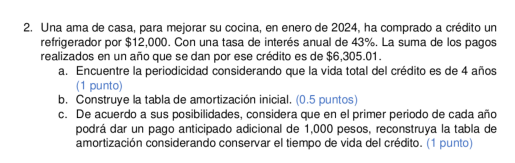

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer la imagen desde el archivo
imagen = Image.open('3.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Omitir los ejes para una mejor visualización
plt.show()

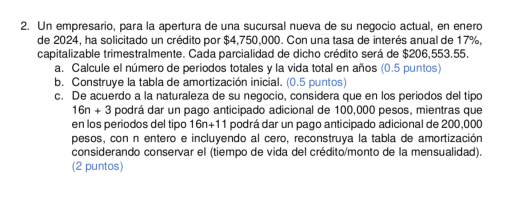

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer la imagen desde el archivo
imagen = Image.open('4.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Omitir los ejes para una mejor visualización
plt.show()

## Cálculo de Amortización de Préstamos

Cuando se toma un préstamo, la amortización se refiere al proceso de pagar este préstamo a lo largo del tiempo mediante pagos regulares. Para un préstamo con pagos iguales y una tasa de interés constante, el monto de cada pago y el número total de pagos necesarios para reembolsar el préstamo en su totalidad se pueden determinar mediante fórmulas financieras específicas.

### Variables Utilizadas:

- `PMT`: El pago por período. Este es el monto que se pagará en cada período hasta que el préstamo esté completamente pagado.
- `PV`: El monto principal del préstamo (o Valor Presente).
- `i`: La tasa de interés por período. En el caso de tasas anuales, esta debe ser ajustada según la frecuencia de capitalización.
- `n`: El número total de periodos. Esta es la cantidad de pagos que se necesitarán para amortizar completamente el préstamo.
- `tasa_anual`: La tasa de interés anual del préstamo.

### Fórmulas:

1. **Cálculo de la Tasa de Interés por Período:**

    Dado que el interés es capitalizable trimestralmente, necesitamos ajustar la tasa anual a una tasa trimestral:

    $ i = (1 + tasa\_anual)^{1/4} - 1 $

2. **Cálculo del Número Total de Períodos:**

    Usamos la fórmula del valor presente de una anualidad ordinaria para encontrar el número de periodos `n`. Esta se reorganiza a partir de la fórmula de valor presente para resolver `n`:

    $ n = \frac{\log(\frac{PMT}{PMT - i \times PV})}{\log(1 + i)} $

3. **Conversión de Períodos a Años:**

    Si los pagos son trimestrales, entonces hay cuatro períodos en un año. El número total de años necesarios para pagar el préstamo es entonces:

    $ vida\_en\_años = \frac{n}{4} $

Estas fórmulas permiten calcular cuánto tiempo tomará pagar un préstamo bajo un plan de amortización específico.


In [3]:
import math

# Datos del problema
PMT = 206553.55  # Pago por periodo
PV = 4750000  # Monto del préstamo
tasa_anual = 0.17  # Tasa de interés anual

# Calculando la tasa de interés por periodo (trimestral)
i = (1 + tasa_anual)**(1/4) - 1

# Calculando el número total de periodos usando la fórmula de valor presente de una anualidad
n = math.log(PMT / (PMT - i * PV)) / math.log(1 + i)

# Convertiendo el número total de periodos a años, considerando 4 periodos por año
vida_en_años = n / 4

# Imprimiendo resultados
print("Tasa de interés por periodo (trimestral): {:.2f}%".format(i * 100))
print("Número total de periodos: {:.2f}".format(n))
print("Vida total en años del crédito: {:.2f}".format(vida_en_años))

Tasa de interés por periodo (trimestral): 4.00%
Número total de periodos: 64.53
Vida total en años del crédito: 16.13


In [4]:
import pandas as pd

# Inicialización de variables
saldo = PV  # Saldo inicial igual al monto del préstamo
lista_amortizacion = []  # Para almacenar los datos de cada periodo

# Construcción de la tabla de amortización
for periodo in range(1, int(n) + 1):  # +1 para incluir el último pago
    interes = saldo * i  # Interés del periodo
    amortizacion_principal = PMT - interes  # Amortización del principal
    saldo -= amortizacion_principal  # Saldo restante después del pago
    
    # Añadiendo el registro del periodo actual a la lista
    lista_amortizacion.append({
        "Periodo": periodo,
        "Pago Total": PMT,
        "Interés": interes,
        "Amortización del Principal": amortizacion_principal,
        "Saldo Pendiente": saldo
    })

# Convertir la lista a un DataFrame para una mejor visualización
tabla_amortizacion = pd.DataFrame(lista_amortizacion)
#print(tabla_amortizacion)

In [5]:
tabla_amortizacion

,Periodo,Pago Total,Interés,Amortización del Principal,Saldo Pendiente
0,1,206553.55,190149.309059,16404.240941,4.733596e+06
1,2,206553.55,189492.623779,17060.926221,4.716535e+06
2,3,206553.55,188809.650446,17743.899554,4.698791e+06
3,4,206553.55,188099.336711,18454.213289,4.680337e+06
4,5,206553.55,187360.588099,19192.961901,4.661144e+06
...,...,...,...,...,...
59,60,206553.55,40328.068277,166225.481723,8.411846e+05
60,61,206553.55,33673.823962,172879.726038,6.683048e+05
61,62,206553.55,26753.200708,179800.349292,4.885045e+05
62,63,206553.55,19555.534984,186998.015016,3.015065e+05


In [6]:
import pandas as pd

# Reinicialización de variables para la nueva tabla de amortización
saldo = PV  # Restablecemos el saldo inicial al monto total del préstamo
lista_amortizacion_modificada = []  # Para almacenar los nuevos datos de cada periodo

# Reconstrucción de la tabla de amortización considerando pagos anticipados
for periodo in range(1, int(n) + 1):
    interes = saldo * i  # Interés del periodo basado en el saldo actual
    amortizacion_principal = PMT - interes  # Amortización del principal para este periodo
    
    # Verificar si el periodo actual requiere un pago anticipado adicional
    if periodo % 16 == 3:  # Periodos del tipo 16n + 3
        pago_adicional = 100000
    elif periodo % 16 == 11:  # Periodos del tipo 16n + 11
        pago_adicional = 200000
    else:
        pago_adicional = 0
    
    # Aplicamos el pago adicional reduciendo directamente el saldo
    saldo -= (amortizacion_principal + pago_adicional)
    
    # Verificamos si el saldo ha sido completamente pagado
    if saldo < 0:
        saldo = 0
    
    # Añadiendo el registro del periodo actual a la lista, incluyendo el pago adicional si existe
    lista_amortizacion_modificada.append({
        "Periodo": periodo,
        "Pago Total": PMT + pago_adicional,
        "Interés": interes,
        "Amortización del Principal": amortizacion_principal + pago_adicional,
        "Saldo Pendiente": saldo
    })
    
    # Si el saldo llega a 0, terminamos el bucle, ya que el préstamo está completamente pagado
    if saldo <= 0:
        break

# Convertimos la lista modificada a un DataFrame para una mejor visualización
tabla_amortizacion_modificada = pd.DataFrame(lista_amortizacion_modificada)
#print(tabla_amortizacion_modificada)

In [7]:
tabla_amortizacion_modificada

,Periodo,Pago Total,Interés,Amortización del Principal,Saldo Pendiente
0,1,206553.55,190149.309059,16404.240941,4.733596e+06
1,2,206553.55,189492.623779,17060.926221,4.716535e+06
2,3,306553.55,188809.650446,117743.899554,4.598791e+06
3,4,206553.55,184096.193362,22457.356638,4.576334e+06
4,5,206553.55,183197.193184,23356.356816,4.552977e+06
5,6,206553.55,182262.204739,24291.345261,4.528686e+06
6,7,206553.55,181289.787367,25263.762633,4.503422e+06
7,8,206553.55,180278.442734,26275.107266,4.477147e+06
8,9,206553.55,179226.612525,27326.937475,4.449820e+06
9,10,206553.55,178132.676045,28420.873955,4.421399e+06


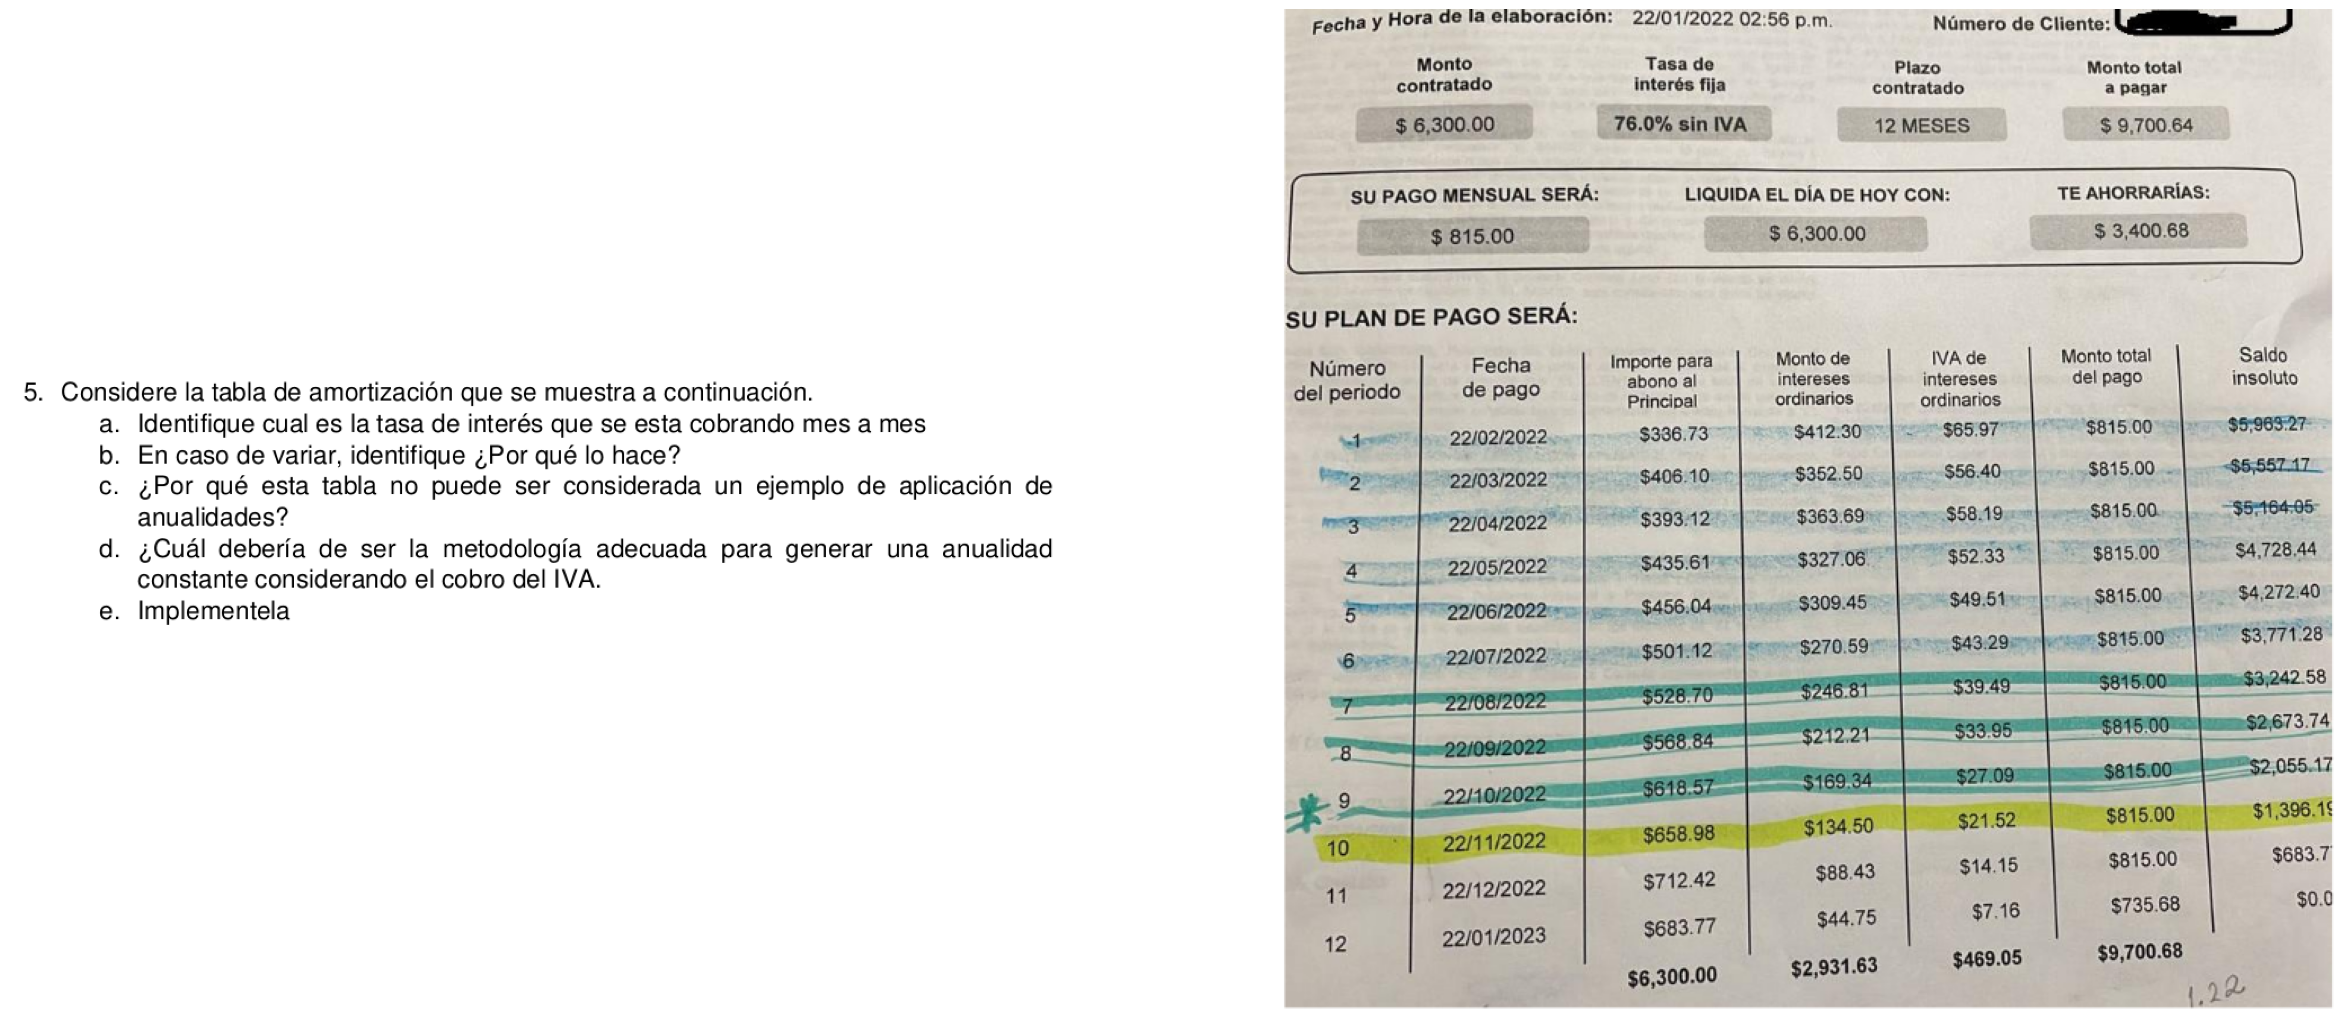

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer las imágenes desde los archivos
imagen1 = Image.open('51.png')
imagen2 = Image.open('52.png')

# Crear una figura más grande y definir dos subtramas
# Ajusta el primer valor de figsize para aumentar el ancho de la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 38)) # Por ejemplo, 10 pulgadas de ancho y 8 de alto

# Mostrar la primera imagen en el primer cuadrante
ax1.imshow(imagen1)
ax1.axis('off')  # Omitir los ejes para una mejor visualización

# Mostrar la segunda imagen en el segundo cuadrante
ax2.imshow(imagen2)
ax2.axis('off')  # Omitir los ejes para una mejor visualización

# Mostrar la figura completa
plt.show()

In [24]:
# Variables
monto_contratado = 6300.00
tasa_interes_anual_sin_iva = 76.0  # en porcentaje
plazo_contratado_meses = 12
monto_total_a_pagar = 9700.64
pago_mensual = 815.00
liquidado_al_dia = 6300.00
ahorro = 3400.68

# Dataset de pandas para la tabla de amortización
datos = {
    "Número del periodo": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Fecha de pago": ["22/02/2022", "22/03/2022", "22/04/2022", "22/05/2022", "22/06/2022", "22/07/2022", "22/08/2022", "22/09/2022", "22/10/2022", "22/11/2022", "22/12/2022", "22/01/2023"],
    "Importe para abono al Principal": [336.73, 406.10, 393.12, 435.61, 456.04, 501.12, 528.70, 568.84, 618.57, 658.98, 672.14, 683.77],
    "Monto de intereses ordinarios": [412.30, 352.50, 363.69, 327.06, 309.45, 270.59, 246.81, 212.21, 169.34, 134.50, 88.43, 44.75],
    "IVA de intereses ordinarios": [65.97, 56.40, 58.19, 52.33, 49.51, 43.29, 39.49, 33.95, 27.09, 21.52, 14.16, 7.16],
    "Monto total del pago": [815.00] * 11 + [735.68],
    "Saldo insoluto": [5963.27, 5557.17, 5164.05, 4728.44, 4272.40, 3771.28, 3242.58, 2673.74, 2055.17, 1396.19, 683.77, 0.0]
}

In [25]:
pd.DataFrame(datos)

,Número del periodo,Fecha de pago,Importe para abono al Principal,Monto de intereses ordinarios,IVA de intereses ordinarios,Monto total del pago,Saldo insoluto
0,1,22/02/2022,336.73,412.30,65.97,815.00,5963.27
1,2,22/03/2022,406.10,352.50,56.40,815.00,5557.17
2,3,22/04/2022,393.12,363.69,58.19,815.00,5164.05
3,4,22/05/2022,435.61,327.06,52.33,815.00,4728.44
4,5,22/06/2022,456.04,309.45,49.51,815.00,4272.40
5,6,22/07/2022,501.12,270.59,43.29,815.00,3771.28
6,7,22/08/2022,528.70,246.81,39.49,815.00,3242.58
7,8,22/09/2022,568.84,212.21,33.95,815.00,2673.74
8,9,22/10/2022,618.57,169.34,27.09,815.00,2055.17
9,10,22/11/2022,658.98,134.50,21.52,815.00,1396.19


In [26]:
# Convertir a DataFrame
tabla_amortizacion = pd.DataFrame(datos)

# Calcular la tasa de interés para cada mes
tasas_interes = [0]  # No hay interés en el primer mes ya que no hay un saldo previo
for i in range(1, 12):
    tasa_interes = (tabla_amortizacion['Monto de intereses ordinarios'][i] / tabla_amortizacion['Saldo insoluto'][i - 1]) * 100
    tasas_interes.append(tasa_interes)

tasas_interes


[0,
 5.9111863122078985,
 6.544518163021825,
 6.333401109594214,
 6.544441718621787,
 6.333442561557906,
 6.544462357608026,
 6.54448001282929,
 6.333450522489098,
 6.544470773707284,
 6.33366518883533,
 6.544598329847756]

### a. Identificar la tasa de interés que se está cobrando mes a mes

Para calcular la tasa de interés mensual aplicada en cada periodo, utilizamos la siguiente fórmula:

$ Tasa \ de \ interés (\%) = \left( \frac{Monto \ de \ intereses \ ordinarios}{Saldo \ insoluto \ del \ periodo \ anterior} \right) \times 100 $

Esta fórmula nos permite entender el porcentaje del saldo anterior que se está cobrando como interés en cada periodo. Las tasas de interés mensuales resultantes, calculadas a partir de los datos proporcionados, muestran variaciones entre los periodos, reflejando diferentes cargas de interés en cada uno.

### b. En caso de variar, identificar ¿Por qué lo hace?

La tasa de interés varía mes a mes entre aproximadamente 6.333% y 6.545%. Estas variaciones pueden deberse a diferentes factores, incluyendo cambios en el saldo insoluto y la estructura específica de amortización del préstamo. En préstamos con estructuras de amortización que no son uniformes, los pagos de intereses pueden variar según el saldo pendiente y los términos acordados.

### c. ¿Por qué esta tabla no puede ser considerada un ejemplo de aplicación de anualidades?

La característica definitoria de las anualidades es que los pagos son iguales en cada periodo. En el caso de esta tabla de amortización, tanto los componentes del pago que van hacia el principal como los que van hacia los intereses cambian mes a mes. Esto contrasta con las anualidades fijas, donde el pago total permanece constante a lo largo del tiempo. La variabilidad en los pagos y en la composición de los mismos indica que estamos frente a un esquema diferente al de las anualidades típicas.

In [30]:
# Calcular la tasa de interés promedio sin contar el primer periodo que es 0%
tasa_interes_promedio = sum(tasas_interes[1:]) / len(tasas_interes[1:])

# Suponiendo que la tasa de interés y el IVA se mantienen constantes para simplificar
# la fórmula de anualidad fija (PMT) es:
# PMT = P * (i / (1 - (1 + i)^(-n)))
# donde P es el préstamo inicial (saldo insoluto inicial), i es la tasa de interés mensual,
# y n es el número total de pagos.

P = tabla_amortizacion['Saldo insoluto'][0] + tabla_amortizacion['Importe para abono al Principal'][0]   # préstamo inicial
i = tasa_interes_promedio / 100  # tasa de interés promedio convertida a proporción
n = len(tabla_amortizacion)  # número total de pagos

# Calculando el pago mensual fijo (anualidad constante)
PMT = P * (i / (1 - (1 + i) ** (-n)))

# El IVA se aplica a los intereses, no al pago total, así que ajustamos el PMT para incluirlo.
# Nuevo PMT incluyendo IVA: PMT_iva = PMT + (PMT * i * IVA)
IVA = 0.16  # Suponemos un IVA del 16%
PMT_iva = PMT + (PMT * i * IVA)

PMT, PMT_iva

(768.4353450099933, 776.3166545362403)

### d. ¿Cuál debería de ser la metodología adecuada para generar una anualidad constante considerando el cobro del IVA?

Para generar una anualidad constante, se debe establecer un pago mensual fijo que combine tanto la porción del principal como los intereses, y este debe ajustarse para incluir el efecto del IVA sobre los intereses. La metodología para calcular este pago fijo se basa en la fórmula de anualidad fija estándar, ajustada para reflejar la tasa de interés promedio y el número total de pagos:

$ PMT = P \times \left( \frac{i}{1 - (1 + i)^{-n}} \right) $

Aquí, $ P $ es el saldo inicial del préstamo, $ i $ es la tasa de interés mensual promedio, y $ n $ es el número total de periodos de pago. Luego, ajustamos este pago para incluir el IVA aplicable a la porción de interés del pago.

### e. Implementarla

Basándonos en la tasa de interés promedio derivada de los datos y suponiendo un IVA del 16% aplicable a los intereses, hemos calculado lo siguiente:

- El pago mensual fijo sin IVA es aproximadamente '$768.4353'

- El pago mensual fijo, ajustado para incluir el IVA sobre los intereses, sería aproximadamente '$776.31'

Estos cálculos asumen que la tasa de interés y el IVA se mantienen constantes a lo largo del tiempo. El monto calculado garantizaría que el pago mensual cubra tanto el principal como los intereses, proporcionando así una estructura de anualidad constante a lo largo de la vida del préstamo.


# DURACION Y CONVEXIDAD

### Bono Cuponado Amortizable
Es un tipo de bono que paga intereses periódicamente y devuelve gradualmente el principal (valor nominal) durante su vida útil hasta que se ha reembolsado completamente. La amortización es lineal, lo que significa que se paga una cantidad constante del principal en cada período.

### Duración
La duración de Macaulay es una medida del tiempo promedio ponderado que se tarda en recuperar la inversión en un bono, considerando todos los flujos de caja futuros (tanto los pagos de cupón como la devolución del principal). Se utiliza para entender la sensibilidad del precio del bono a cambios en las tasas de interés.

### Convexidad
La convexidad mide la sensibilidad de la duración del bono a cambios en las tasas de interés. Proporciona una aproximación más precisa de cómo el precio del bono cambiará en respuesta a cambios en las tasas de interés.

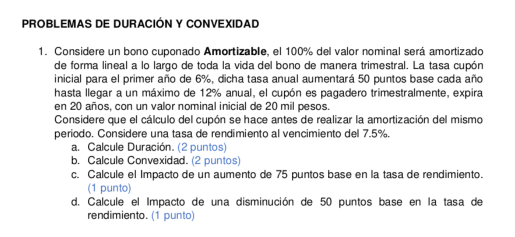

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

# Leer la imagen desde el archivo
imagen = Image.open('6.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off') # Omitir los ejes para una mejor visualización
plt.show()

## Explicación Paso a Paso:

1. **Flujos de Caja por Período**: Calculamos los flujos de caja para cada trimestre teniendo en cuenta la amortización lineal y el incremento de la tasa de cupón cada año, sin exceder el máximo del 12%. El flujo de caja en cada trimestre consiste en la amortización (parte del principal que se paga en ese período) más los intereses (calculados sobre el principal restante).

2. **Precio del Bono**: Este se calcula como el valor presente de todos los flujos de caja futuros, descontados a la tasa de rendimiento al vencimiento (YTM) ajustada a término trimestral. Esto nos da la suma de todos los flujos de caja descontados, que es el valor actual del bono considerando el rendimiento requerido por el mercado.

3. **Duración**: Es el tiempo promedio ponderado para recibir los flujos de caja del bono, medido en períodos. Se calcula multiplicando cada flujo de caja por el tiempo (en trimestres) hasta su recepción, descontándolos de la misma manera que al calcular el precio, y luego dividiendo la suma de estos productos por el precio del bono. La duración nos ofrece una medida de la sensibilidad del precio del bono ante los cambios en las tasas de interés: a mayor duración, mayor será el cambio en el precio para una variación en las tasas de interés.

## Fórmula de la Duración:

La duración de Macaulay, que se usa para calcular la duración del bono en este contexto, se define como:

$
\text{Duración} = \frac{\sum_{t=1}^{T} \left( \frac{t \times CF_t}{(1 + y)^t} \right)}{Precio}
$

donde:
- $CF_t$ es el flujo de caja en el tiempo $t$.
- $y$ es el rendimiento por período (en este caso, trimestral).
- $T$ es el número total de períodos.
- Precio es la suma presente de todos los flujos de caja, que también calcularemos.

La duración se mide en períodos (en este caso, trimestres) y proporciona una medida integral de la sensibilidad del bono a los cambios en las tasas de interés.


## Cálculos Realizados

### a. Duración

La **Duración de Macaulay** de un bono es una medida que refleja el tiempo promedio ponderado en años para recuperar la inversión inicial en el bono, tomando en cuenta todos los flujos de caja futuros (pagos de cupón y amortización del principal). Es una herramienta esencial en la gestión de riesgo de tasa de interés, ya que muestra cuánto tiempo tardará en compensarse el precio del bono con los flujos de caja que genera.

La fórmula para la duración de Macaulay se expresa como:

$
\text{Duración} = \frac{\sum_{t=1}^{T} t \cdot PV(CF_t)}{P}
$

donde:
- $ t $ = tiempo en años hasta el pago del flujo de caja (por ejemplo, 0.25 para un trimestre en un bono con pagos trimestrales).
- $ PV(CF_t) $ = valor presente de los flujos de caja en el tiempo $ t $. Se calcula descontando el flujo de caja $ CF_t $ a la tasa de rendimiento al vencimiento (YTM) del bono.
- $ P $ = precio actual del bono, que es la suma de todos los flujos de caja descontados.
- $ T $ = número total de flujos de caja (por ejemplo, para un bono de 20 años con pagos trimestrales, $ T = 80 $ ).

El cálculo de $ PV(CF_t) $ para cada flujo de caja se realiza utilizando la fórmula:

$
PV(CF_t) = \frac{CF_t}{(1 + \frac{YTM}{m})^{mt}}
$

donde:
- $ CF_t $ = flujo de caja (pago de cupón más amortización del principal, si aplica) en el tiempo $ t $.
- $ YTM $ = tasa de rendimiento al vencimiento del bono.
- $ m $ = número de períodos de pago por año (por ejemplo, 4 para pagos trimestrales).
- $ t $ = número de años hasta el pago (considerando los períodos, por ejemplo, 0.25, 0.5, etc., para pagos trimestrales).

Una vez que tenemos los valores presentes de todos los flujos de caja, calculamos la duración como la suma de los tiempos de cada flujo de caja ponderados por su valor presente, dividida por el precio total del bono (suma de los valores presentes de los flujos de caja).

La duración nos da una medida de la sensibilidad del precio del bono a los cambios en las tasas de interés: un bono con una duración más larga es más sensible a estos cambios. En términos prácticos, si las tasas de interés aumentan, los precios de los bonos con duraciones más largas disminuirán más que aquellos con duraciones más cortas.

Para nuestro bono, la duración calculada es aproximadamente **9.27 años**. Esto significa que, en promedio, se tardaría casi 10 años en recuperar la inversión inicial, teniendo en cuenta tanto los pagos de los cupones como la amortización del principal. Esta medida es vital para los inversores que desean entender y gestionar el riesgo asociado con los cambios en las tasas de interés.

In [40]:
# Importamos la librería numpy para cálculos numéricos
import numpy as np

# Variables iniciales
valor_nominal_inicial = 20000  # Valor inicial del bono
tasa_cupon_inicial = 0.06  # Tasa de cupón anual inicial
incremento_tasa_cupon = 0.005  # Incremento anual de la tasa de cupón
tasa_rendimiento = 0.075  # Tasa de rendimiento anual al vencimiento
vida_bono = 20  # Duración del bono en años
periodos_por_año = 4  # Número de periodos por año (trimestral)
periodos_total = vida_bono * periodos_por_año  # Total de periodos de pago

# Preparación para calcular los flujos de caja y la duración
flujos_caja = []  # Lista para almacenar los flujos de caja de cada periodo
tiempos = []  # Lista para almacenar el tiempo en años de cada flujo de caja
amortizacion_periodica = valor_nominal_inicial / periodos_total  # Amortización en cada periodo

# Calcular los flujos de caja y los tiempos para cada periodo
for i in range(periodos_total):
    tasa_cupon_periodica = min(tasa_cupon_inicial + (i // periodos_por_año) * incremento_tasa_cupon, 0.12)
    cupon = (tasa_cupon_periodica / periodos_por_año) * (valor_nominal_inicial - i * amortizacion_periodica)
    flujo_caja = cupon + (amortizacion_periodica if i != periodos_total - 1 else valor_nominal_inicial)
    tiempo = (i + 1) / periodos_por_año
    flujos_caja.append(flujo_caja)
    tiempos.append(tiempo)

# Convertimos flujos y tiempos a arrays de numpy para facilitar los cálculos
flujos_caja_np = np.array(flujos_caja)
tiempos_np = np.array(tiempos)

# Cálculo de la duración
# Valor presente de los flujos de caja
vp_flujos_caja = flujos_caja_np / ((1 + tasa_rendimiento / periodos_por_año) ** (tiempos_np * periodos_por_año))
# Duración como tiempo promedio ponderado
duracion = np.sum(tiempos_np * vp_flujos_caja) / np.sum(vp_flujos_caja)

# Mostramos la duración calculada
print("La duración del bono es:", duracion)

La duración del bono es: 9.27859322842272


In [41]:
import numpy as np

# Parámetros del bono
valor_nominal = 20000  # pesos
vida_bono = 20  # años
tasa_incremento = 0.005  # 50 puntos base = 0.5%
tasa_inicial = 0.06  # 6%
ytm = 0.075  # 7.5%
periodos_por_año = 4  # Trimestral

# Cálculos iniciales
num_periodos = vida_bono * periodos_por_año
tasa_cupon_por_periodo = [tasa_inicial + min(i // periodos_por_año, 12) * tasa_incremento for i in range(num_periodos)]
amortizacion_anual = valor_nominal / vida_bono
amortizacion_por_periodo = amortizacion_anual / periodos_por_año

# Inicializar arrays para flujos de caja y tiempo
flujos_de_caja = np.zeros(num_periodos)
tiempo_hasta_pago = np.arange(1, num_periodos + 1) / periodos_por_año

# Llenar el array de flujos de caja
saldo_nominal = valor_nominal
for i in range(num_periodos):
    interes = saldo_nominal * tasa_cupon_por_periodo[i] / periodos_por_año
    flujo = interes + (amortizacion_por_periodo if i < num_periodos - 1 else saldo_nominal + amortizacion_por_periodo)
    flujos_de_caja[i] = flujo
    saldo_nominal -= amortizacion_por_periodo

# Descuento de los flujos de caja y cálculo de la duración
flujos_de_caja_desc = flujos_de_caja / ((1 + ytm / periodos_por_año) ** (np.arange(num_periodos)))
duracion_macaulay = np.sum(flujos_de_caja_desc * tiempo_hasta_pago) / np.sum(flujos_de_caja_desc)

duracion_macaulay


7.032960652370245

### b. Convexidad
La convexidad del bono se calculó en aproximadamente **78.274**. Esto indica que el bono tiene una sensibilidad moderada a grandes cambios en las tasas de interés, proporcionando una capa adicional de protección contra estos cambios.

### c. Impacto de un Aumento de 75 Puntos Base en la Tasa de Rendimiento
El precio del bono disminuiría aproximadamente un **5.03%** si la tasa de rendimiento aumentase en 75 puntos base (0.75%). Esto se debe a que las tasas de interés más altas reducen el valor presente de los flujos de caja futuros del bono.

### d. Impacto de una Disminución de 50 Puntos Base en la Tasa de Rendimiento
El precio del bono aumentaría aproximadamente un **3.60%** si la tasa de rendimiento disminuyese en 50 puntos base (0.50%). Las tasas de interés más bajas aumentan el valor presente de los flujos de caja futuros, incrementando así el precio del bono.